#  Map plots from shapefiles with geopandas

There are various ways to plot maps with python - using shapefiles and geopandas just seemed to be the most intuitive to me. [Shapefiles](https://en.wikipedia.org/wiki/Shapefile) consist of at least 3 individual files (.shp, .dbf, .shx) and contain all the information you need to describe vector features such as points, lines, polygons and usually contain further data on top (names, statistics). There are other data formats that could be used too (geoJSON for example). 
Shapefiles for a Switzerland map can be downloaded from the [Federal office of topography (swisstopo) for free.](https://shop.swisstopo.admin.ch/en/products/landscape/boundaries3D). 

To read such shapefiles, [geopandas library](http://geopandas.org/) comes in handy:

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

read the file(s) you want to use. In this case i want to plot swiss municipalities, thus 

In [3]:
data = gpd.read_file("shapefiles/swissBOUNDARIES3D_1_3_TLM_HOHEITSGEBIET.shp")
data.head()

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,REVISION_Q,NAME,KANTONSNUM,ICC,EINWOHNERZ,BFS_NUMMER,GEM_TEIL,GEM_FLAECH,SHN,geometry
0,{D5A9677C-FE38-44F6-B0E8-3177F6252C81},2018-11-22,2008-11-24,2000,1,2019,1,Verbessert,AV,2019,...,2018_Aufbau,Scuol,18.0,CH,4598.0,3762,0,43861.0,CH18433762,POLYGON Z ((827799.1638584948 186229.528911313...
1,{B55F9EAE-EB69-4468-A41C-7BB28A6699EE},2018-11-21,2008-11-24,2006,1,2019,1,Verbessert,AV,2019,...,2018_Aufbau,Glarus Süd,8.0,CH,9581.0,1631,0,43003.0,CH08001631,POLYGON Z ((714000.2714363432 197614.962205611...
2,{AB2BA4A5-EB8C-40C7-A259-271DAC93C767},2018-11-21,2008-11-24,2000,1,2019,1,Verbessert,AV,2019,...,2018_Aufbau,Zernez,18.0,CH,1532.0,3746,0,34404.0,CH18433746,POLYGON Z ((802710.8875918253 192062.325189146...
3,{550D0610-1EE3-4748-8F29-88072753FFDC},2018-11-21,2008-11-24,2000,1,2019,1,Verbessert,AV,2019,...,2018_Aufbau,Surses,18.0,CH,2343.0,3543,0,32377.0,CH18413543,POLYGON Z ((759766.3167447178 151299.637758996...
4,{C9A12E0C-B661-4ED3-B5D2-C604EC55C7A6},2018-11-21,2008-11-24,1900,1,2019,1,Verbessert,AV,2019,...,2018_Aufbau,Lac Léman (VD),22.0,CH,NaN,9758,1,29756.0,CH22009758,POLYGON Z ((549875.4650059658 147188.823156258...


it can already be plotted:

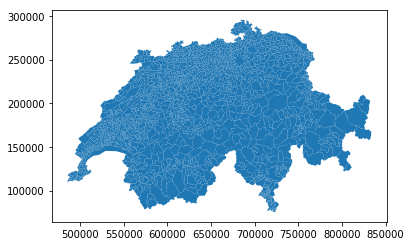

In [5]:
data.plot()

just bern

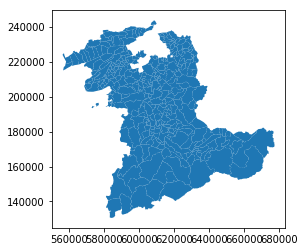

In [31]:
bern = data.query('KANTONSNUM == 2')
bern.plot()

one may also plot information, such as population count etc:

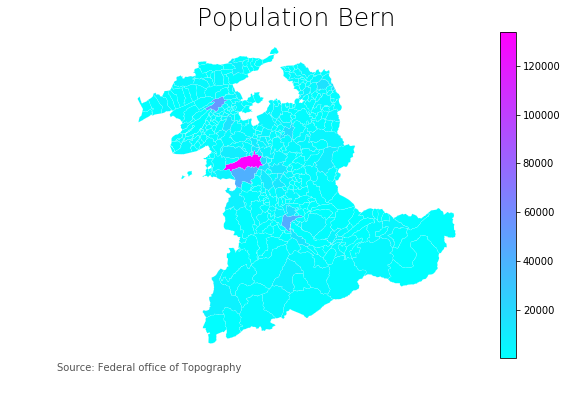

In [33]:
variable = 'EINWOHNERZ'

# set the range for the choropleth
vmin, vmax = min(bern["EINWOHNERZ"]), max(bern["EINWOHNERZ"])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
bern.plot(column=variable, cmap='cool',alpha=1, linewidth=0.1, ax=ax, edgecolor='white')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Population Bern', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Federal office of Topography',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

happy plotting!